In [1]:
#Import necessary packages and the collected data

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

collected_full = pd.read_csv("/Users/DrQ/Documents/Doezema Research/data/CollectedData.csv")

In [2]:
#Cut off unnecessary columns and change date column to datetime datatype

collected_full = collected_full.drop(collected_full.index[2513:])
collected_full['date'] = pd.to_datetime(collected_full['date'])

In [3]:
#Convert datatype of gases that will be analyzed against the ESRL data

ESRL_gases = ['CFC-12 (C/D)','CFC-11 (C/D)','CFC-113 (D)','CCl4 (C/MS)']
for gas in ESRL_gases:
    collected_full[gas] = collected_full[gas].apply(pd.to_numeric, errors = 'coerce')

In [4]:
#make a list of the names of the files of the ESRL data (retrieved from https://www.esrl.noaa.gov/gmd/hats/data.html in November, 2017)
#and a list of the unique years over which SARP data was collected

normal = [('esrl_cfc_12.csv','CFC-12 (C/D)'),('esrl_cfc_11.csv','CFC-11 (C/D)'),('esrl_cfc_113.csv','CFC-113 (D)'),('esrl_ccl4.csv','CCl4 (C/MS)')]
collected_years = collected_full['SARP Year'].unique()

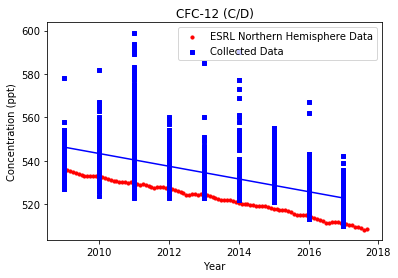

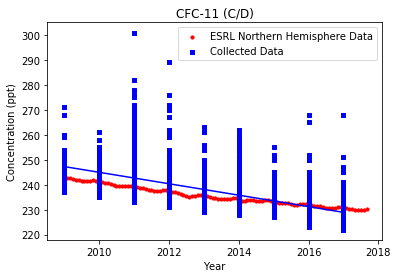

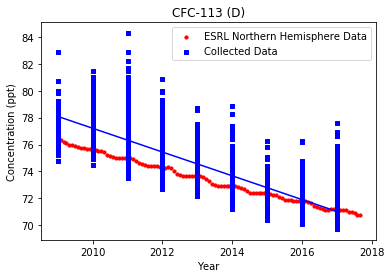

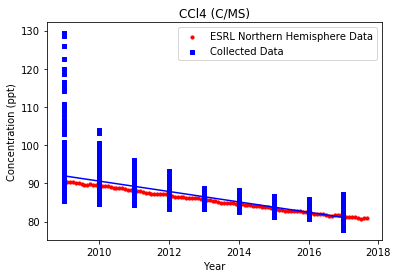

In [5]:
#create plot of the ESRL data vs. collected SARP data for the four gases of interest

for t in normal:
    esrl_data = pd.read_csv("/Users/DrQ/Documents/Doezema Research/data/"+t[0])
    esrl_data['date'] = esrl_data['Year'] + ((esrl_data['Month'] - 1)/12)
    esrl_similar_years = esrl_data[esrl_data['Year'].isin(collected_years)]
    dual_plot = plt.figure()
    axis = dual_plot.add_subplot(111)
    axis.scatter(x=esrl_similar_years['date'], y=esrl_similar_years['NH'], s=10, c='r', marker='o', label='ESRL Northern Hemisphere Data')
    axis.scatter(x=collected_full['SARP Year'], y=collected_full[t[1]], s=10, c='b', marker='s', label='Collected Data')
    fit = np.polyfit(collected_full['SARP Year'], collected_full[t[1]], deg=1)
    axis.plot(collected_full['SARP Year'], fit[0] * collected_full['SARP Year'] + fit[1], color='blue', label='_nolegend_')
    plt.title(t[1])
    plt.xlabel('Year')
    plt.ylabel('Concentration (ppt)')
    plt.legend()
    plt.show()
    

In [6]:
#create seperate samller databases for the samples collected in different altitude pools

collected_above_10000 = collected_full[collected_full['AltP_feet'] > 10000]
collected_5000_to_10000 = collected_full[collected_full['AltP_feet'] <= 10000]
collected_5000_to_10000 = collected_5000_to_10000[collected_5000_to_10000['AltP_feet'] > 5000]
collected_under_5000 = collected_full[collected_full['AltP_feet'] <= 5000]

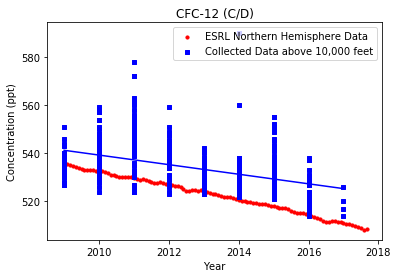

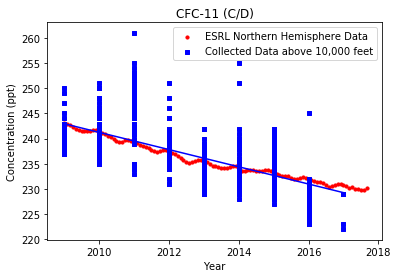

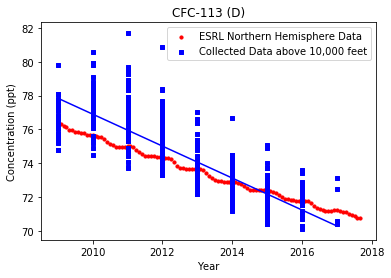

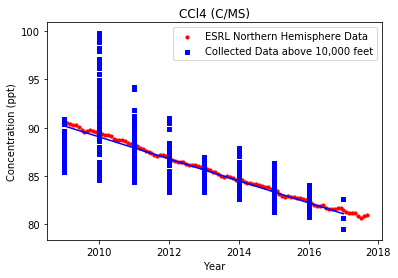

In [7]:
#create plot of the ESRL data vs. collected SARP data for the four gases of interest collected above 10000 ft.

for t in normal:
    esrl_data = pd.read_csv("/Users/DrQ/Documents/Doezema Research/data/"+t[0])
    esrl_data['date'] = esrl_data['Year'] + ((esrl_data['Month'] - 1)/12)
    esrl_similar_years = esrl_data[esrl_data['Year'].isin(collected_years)]
    dual_plot = plt.figure()
    axis = dual_plot.add_subplot(111)
    axis.scatter(x=esrl_similar_years['date'], y=esrl_similar_years['NH'], s=10, c='r', marker='o', label='ESRL Northern Hemisphere Data')
    axis.scatter(x=collected_above_10000['SARP Year'], y=collected_above_10000[t[1]], s=10, c='b', marker='s', label='Collected Data above 10,000 feet')
    fit = np.polyfit(collected_above_10000['SARP Year'], collected_above_10000[t[1]], deg=1)
    axis.plot(collected_above_10000['SARP Year'], fit[0] * collected_above_10000['SARP Year'] + fit[1], color='blue', label='_nolegend_')
    plt.title(t[1])
    plt.xlabel('Year')
    plt.ylabel('Concentration (ppt)')
    plt.legend()
    plt.show()

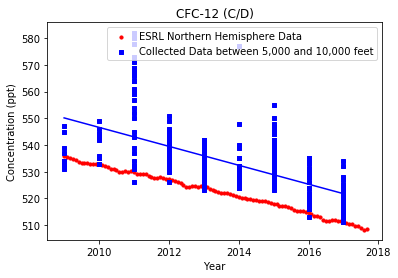

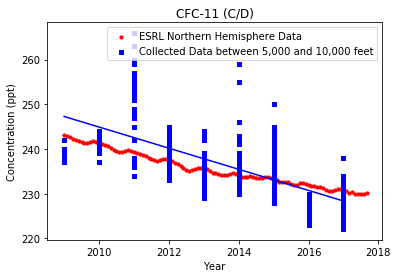

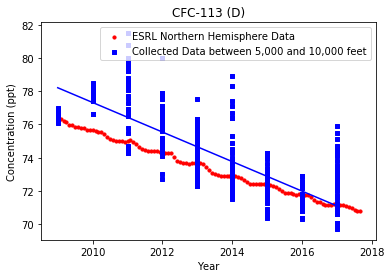

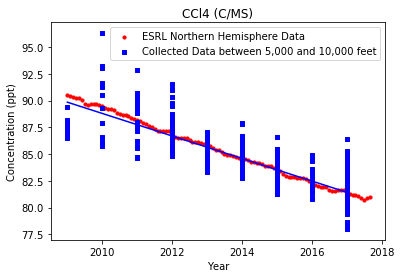

In [8]:
#create plot of the ESRL data vs. collected SARP data for the four gases of interest collected between 5000 ft. and 10000 ft.

for t in normal:
    esrl_data = pd.read_csv("/Users/DrQ/Documents/Doezema Research/data/"+t[0])
    esrl_data['date'] = esrl_data['Year'] + ((esrl_data['Month'] - 1)/12)
    esrl_similar_years = esrl_data[esrl_data['Year'].isin(collected_years)]
    dual_plot = plt.figure()
    axis = dual_plot.add_subplot(111)
    axis.scatter(x=esrl_similar_years['date'], y=esrl_similar_years['NH'], s=10, c='r', marker='o', label='ESRL Northern Hemisphere Data')
    axis.scatter(x=collected_5000_to_10000['SARP Year'], y=collected_5000_to_10000[t[1]], s=10, c='b', marker='s', label='Collected Data between 5,000 and 10,000 feet')
    fit = np.polyfit(collected_5000_to_10000['SARP Year'], collected_5000_to_10000[t[1]], deg=1)
    axis.plot(collected_5000_to_10000['SARP Year'], fit[0] * collected_5000_to_10000['SARP Year'] + fit[1], color='blue', label='_nolegend_')
    plt.title(t[1])
    plt.xlabel('Year')
    plt.ylabel('Concentration (ppt)')
    plt.legend()
    plt.show()

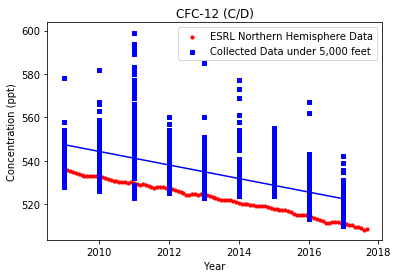

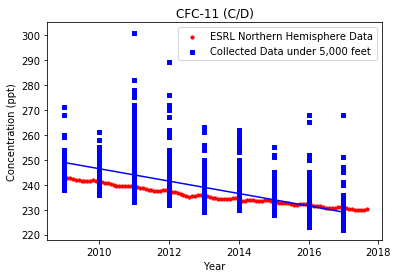

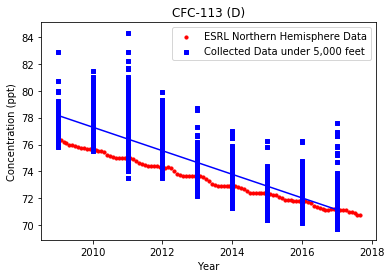

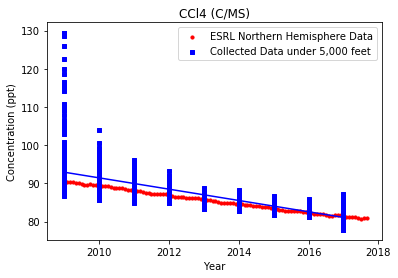

In [9]:
#create plot of the ESRL data vs. collected SARP data for the four gases of interest collected below 5000 ft.

for t in normal:
    esrl_data = pd.read_csv("/Users/DrQ/Documents/Doezema Research/data/"+t[0])
    esrl_data['date'] = esrl_data['Year'] + ((esrl_data['Month'] - 1)/12)
    esrl_similar_years = esrl_data[esrl_data['Year'].isin(collected_years)]
    dual_plot = plt.figure()
    axis = dual_plot.add_subplot(111)
    axis.scatter(x=esrl_similar_years['date'], y=esrl_similar_years['NH'], s=10, c='r', marker='o', label='ESRL Northern Hemisphere Data')
    axis.scatter(x=collected_under_5000['SARP Year'], y=collected_under_5000[t[1]], s=10, c='b', marker='s', label='Collected Data under 5,000 feet')
    fit = np.polyfit(collected_under_5000['SARP Year'], collected_under_5000[t[1]], deg=1)
    axis.plot(collected_under_5000['SARP Year'], fit[0] * collected_under_5000['SARP Year'] + fit[1], color='blue', label='_nolegend_')
    plt.title(t[1])
    plt.xlabel('Year')
    plt.ylabel('Concentration (ppt)')
    plt.legend()
    plt.show()